# Case Study: Insurance Medical Cost Prediction

### Problem Statement - The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\k.udaya shree\Downloads\insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The factors that might affect the health insurance cost are:-

+ Age: Age of the beneficiary
+ Sex: Gender of the beneficiary
+ BMI: Body Mass Index (kg / m^2)
+ Children: Number of children / Number of dependants
+ Smoker: Does smoke or not
+ Region: Residential area of the beneficiary

## Analysing the data stats

In [5]:
data.shape

(1338, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The datatype of the all the categories are correct, hence no changes needed. Also, there are no null valued elements

In [7]:
print(data.sex.unique())
print(data.sex.nunique())

['female' 'male']
2


In [8]:
print(data.region.unique())
print(data.region.nunique())

['southwest' 'southeast' 'northwest' 'northeast']
4


In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.isnull().values.any()

False

In [11]:
data['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

This shows a brief description of the Charges column.

Few observations:-

+ The minimum cost of an insurance is 1121
+ Around 75% of the charges are below 17,000
+ The maximum cost of an insurance is 63770

In [12]:
#Let's check correlation.

data.corr()['charges'].sort_values()

children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

In [13]:
data['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [14]:
data['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [15]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [16]:
data['smoker'].groupby(data['region']).value_counts()

region     smoker
northeast  no        257
           yes        67
northwest  no        267
           yes        58
southeast  no        273
           yes        91
southwest  no        267
           yes        58
Name: smoker, dtype: int64

In [17]:
# Find the "region" with the most "children".

data.groupby('region')[['children']].sum()

#Southeast region have the most children.


,children
region,
northeast,339
northwest,373
southeast,382
southwest,371


<AxesSubplot:xlabel='bmi', ylabel='Density'>

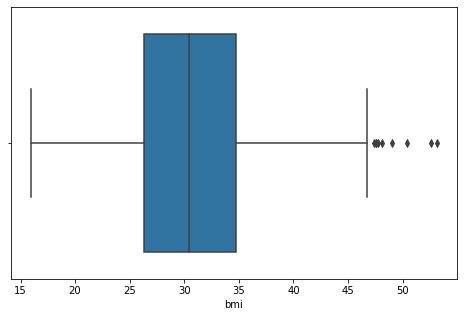

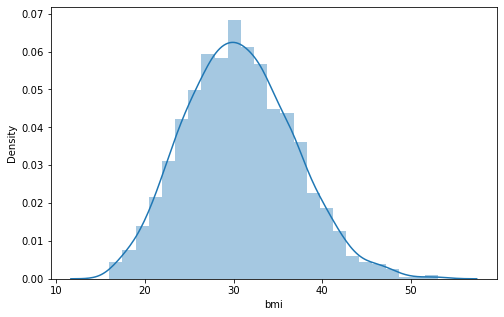

In [18]:
# Is there an outlier in the "bmi" variable? Please review.

fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(data.bmi)

fig, ax = plt.subplots(figsize=(8,5))
sns.distplot(data.bmi)

In [19]:
percentile25 = data['bmi'].quantile(0.25)
percentile75 = data['bmi'].quantile(0.75)
iqr = percentile75 - percentile25
print(iqr)
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

8.3975
Upper limit 47.290000000000006
Lower limit 13.7


In [20]:
data[data['bmi'] > upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


In [21]:
data[data['bmi'] < lower_limit]

,age,sex,bmi,children,smoker,region,charges


In [22]:
new_data = data.copy()

new_data['bmi'] = np.where(new_data['bmi'] > upper_limit, upper_limit, 
                                np.where(new_data['bmi'] < lower_limit, lower_limit,
                                         new_data['bmi']))

In [23]:
new_data.shape

(1338, 7)

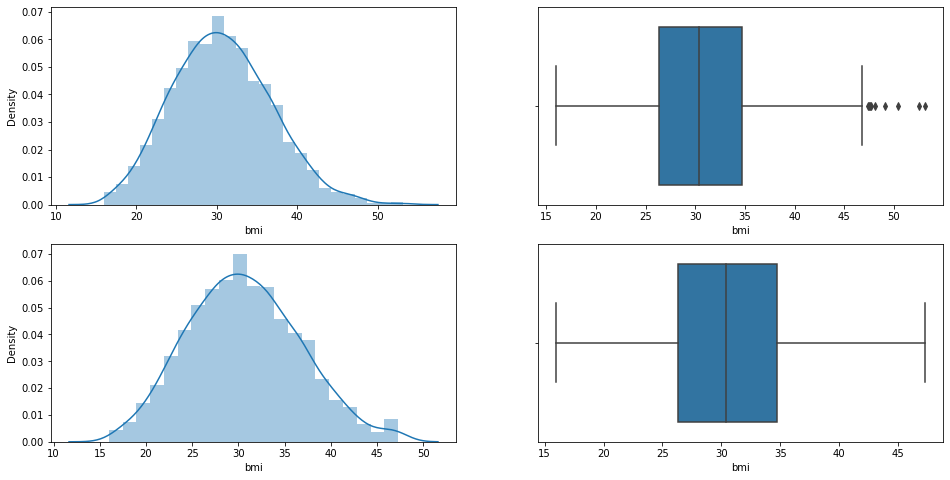

In [24]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['bmi'])

plt.subplot(2,2,2)
sns.boxplot(data['bmi'])

plt.subplot(2,2,3)
sns.distplot(new_data['bmi'])

plt.subplot(2,2,4)
sns.boxplot(new_data['bmi'])

plt.show()

In [25]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Exploratory Data Analysis

Text(0.5, 1.0, 'Correlation Heatmap')

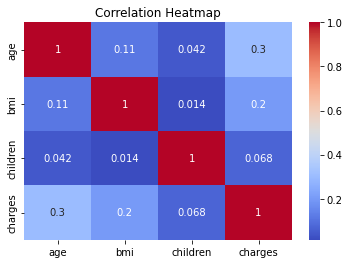

In [26]:
sns.heatmap(new_data.corr(), annot=True, cbar=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Distribution of Bmi')

<Figure size 864x360 with 0 Axes>

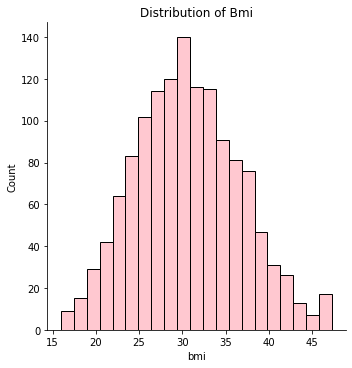

In [27]:
# Examine the distribution of Bmi (Body Mass Index)

plt.figure(figsize=(12,5))
sns.displot(new_data.bmi, color='lightpink')
plt.title('Distribution of Bmi')

# We understand that bmi is concentrated around 30.

Text(0.5, 1.0, 'Smoker - Charges Relationship')

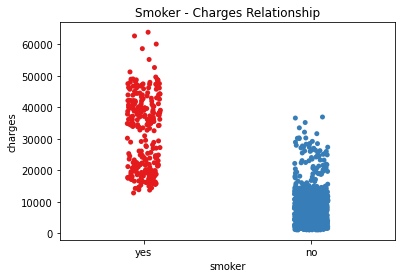

In [28]:
# Examine the relationship between “smoker” and “charges”

sns.stripplot(x=new_data['smoker'], y=new_data['charges'], palette='Set1')
plt.title('Smoker - Charges Relationship')

# Non-Smokers have less charges generally. 

Text(0.5, 1.0, 'Smoker - Region Relationship')

<Figure size 864x504 with 0 Axes>

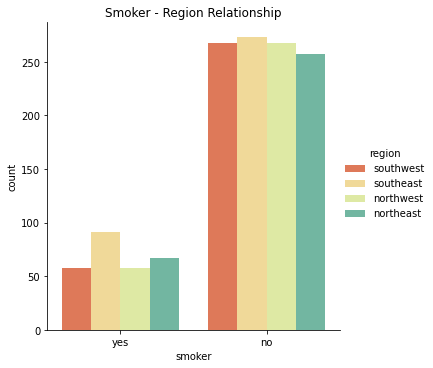

In [29]:
# Examine the relationship between “smoker” and “region”.

plt.figure(figsize = (12,7))
sns.catplot(x='smoker', kind='count', hue ='region', palette='Spectral', data = new_data)
plt.title('Smoker - Region Relationship')

# Southeast region has both the most smokers and the most non-smokers.

Text(0.5, 1.0, 'Smoker Percentage Distribution Chart')

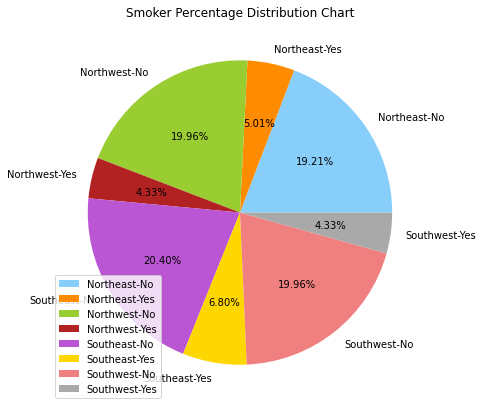

In [30]:
label = ['Northeast-No','Northeast-Yes','Northwest-No','Northwest-Yes','Southeast-No','Southeast-Yes', 'Southwest-No','Southwest-Yes']
colors = ['lightskyblue','darkorange','yellowgreen','firebrick','mediumorchid','gold','lightcoral','darkgrey']

plt.figure(figsize=(12,7))
plt.pie(x=new_data['smoker'].groupby(new_data['region']).value_counts(),labels=label, autopct='%.2f%%', colors=colors)
plt.legend(loc='lower left')
plt.title('Smoker Percentage Distribution Chart')

<AxesSubplot:xlabel='bmi', ylabel='sex'>

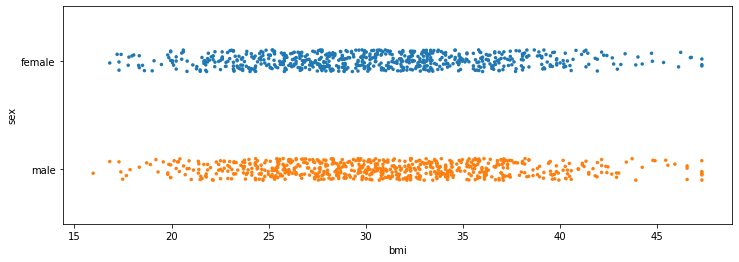

In [31]:
# Examine the relationship between “bmi” and “sex”

plt.figure(figsize=(12,4))
sns.stripplot(x=new_data['bmi'], y=new_data['sex'], size=3.5)

Text(0.5, 1.0, 'Scatter plot of Bmi vs Age')

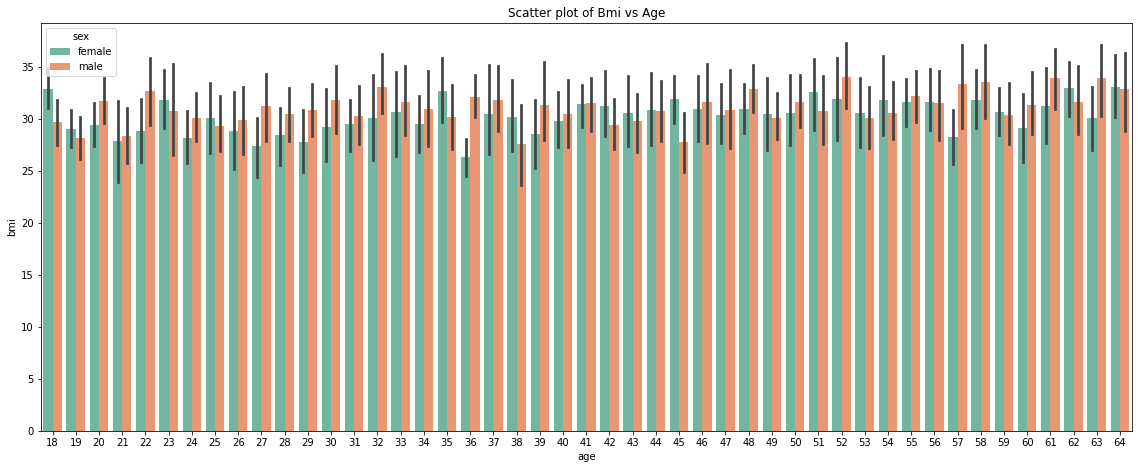

In [32]:
# Examine the relationship between “age” and “bmi”.

f = plt.figure(figsize=(43,7.5))
ax = f.add_subplot(121)
sns.barplot(x='age', y='bmi', data=new_data, hue='sex', ax=ax, palette='Set2')
ax.set_title('Scatter plot of Bmi vs Age')

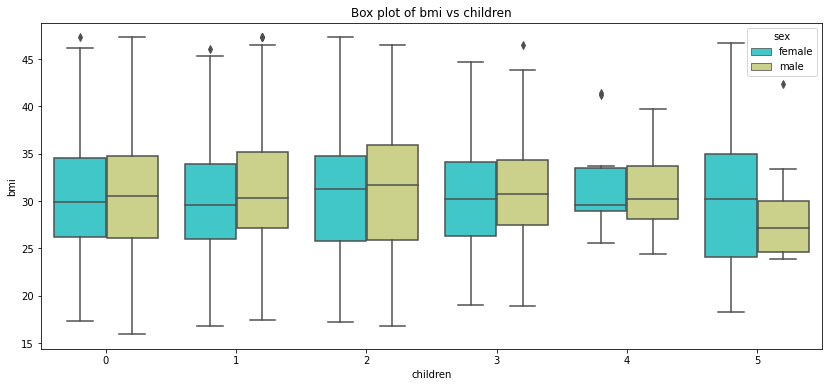

In [33]:
# Examine the relationship between “bmi” and “children”.

plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='bmi', hue='sex', data=new_data, palette='rainbow')
plt.title('Box plot of bmi vs children');

Text(0.5, 1.0, 'Reletionship between BMI-Charges')

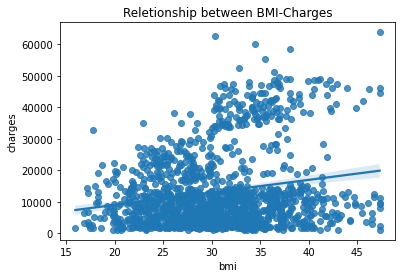

In [34]:
# Examine the relationship between “bmi” and “charges”.

sns.regplot(x=new_data['bmi'], y=new_data['charges'])
plt.title('Reletionship between BMI-Charges')

Text(0.5, 1.0, 'Region - Smoker - Bmi Relationship')

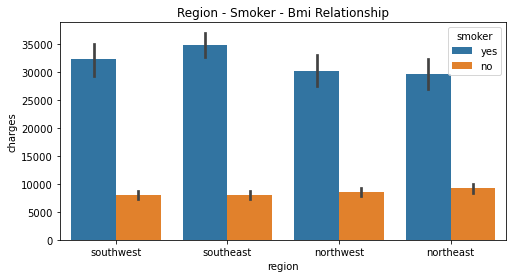

In [35]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

plt.figure(figsize=(8,4))
sns.barplot(x=new_data['region'], y=new_data['charges'], hue=new_data['smoker'])
plt.title('Region - Smoker - Bmi Relationship')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

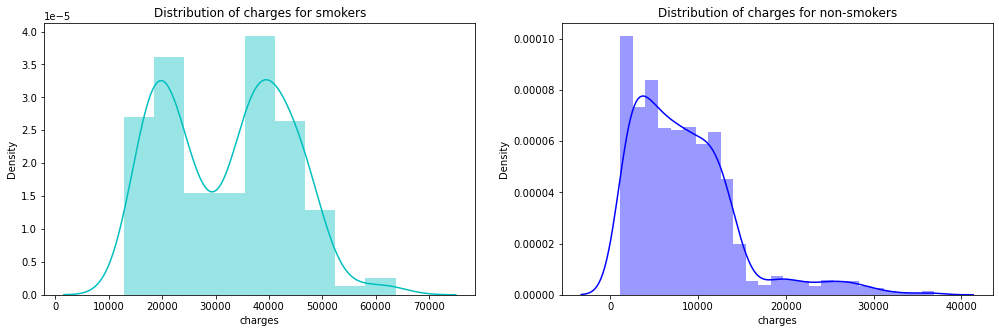

In [36]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.distplot(new_data[(new_data.smoker == 'yes')]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(new_data[(new_data.smoker == 'no')]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

## Identify the Target Variable and Splitting the Data into Train and Test

In [37]:
y = new_data['charges']
X = new_data[['age','sex','bmi','children','smoker','region']]

In [38]:
# Data-preprocessing: Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1003, 6) (1003,)
(335, 6) (335,)


## Separating Categorical and Numerical Columns

In [39]:
X_train.head()

,age,sex,bmi,children,smoker,region
1075,32,female,29.59,1,no,southeast
131,61,female,22.04,0,no,northeast
15,19,male,24.60,1,no,southwest
1223,20,female,24.42,0,yes,southeast
1137,26,female,22.23,0,no,northwest


In [40]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [41]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
1075,female,no,southeast
131,female,no,northeast
15,male,no,southwest
1223,female,yes,southeast
1137,female,no,northwest


In [42]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
1075,32,29.59,1
131,61,22.04,0
15,19,24.60,1
1223,20,24.42,0
1137,26,22.23,0


## Scaling the Numerical Features

In [43]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),columns = X_train_num.columns,index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1075,-0.514853,-0.180022,-0.063607
131,1.548746,-1.402363,-0.892144
15,-1.439915,-0.987900,-0.063607
1223,-1.368757,-1.017042,-0.892144
1137,-0.941805,-1.371602,-0.892144


In [44]:
X_train_num_rescaled.describe()

,age,bmi,children
count,1.003000e+03,1.003000e+03,1.003000e+03
mean,4.427609e-19,2.275791e-16,3.850636e-17
std,1.000499e+00,1.000499e+00,1.000499e+00
min,-1.511074e+00,-2.386711e+00,-8.921441e-01
25%,-9.062258e-01,-7.122665e-01,-8.921441e-01
50%,-1.674320e-02,-6.507371e-02,-6.360657e-02
75%,8.371601e-01,6.634735e-01,7.649309e-01
max,1.762222e+00,2.685597e+00,3.250543e+00


In [45]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.23529412 30.70193918  1.07676969]
Std of each column: [14.05311355  6.17667564  1.20694597]


## Applying OneHotEncoding on Categorical Columns

In [46]:
X_train_cat['sex'].value_counts(normalize=True)

female    0.507478
male      0.492522
Name: sex, dtype: float64

In [47]:
X_train_cat['smoker'].value_counts(normalize=True)

no     0.797607
yes    0.202393
Name: smoker, dtype: float64

In [48]:
X_train_cat['region'].value_counts(normalize=True)

southeast    0.275174
southwest    0.260219
northwest    0.237288
northeast    0.227318
Name: region, dtype: float64

In [49]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat),columns=encoder_.get_feature_names_out(X_train_cat.columns), 
index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
1223,0.0,1.0,0.0,1.0,0.0
1137,0.0,0.0,1.0,0.0,0.0


In [50]:
encoder_.categories_

[array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

## Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [51]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,-0.514853,-0.180022,-0.063607,0.0,0.0,0.0,1.0,0.0
131,1.548746,-1.402363,-0.892144,0.0,0.0,0.0,0.0,0.0
15,-1.439915,-0.987900,-0.063607,1.0,0.0,0.0,0.0,1.0
1223,-1.368757,-1.017042,-0.892144,0.0,1.0,0.0,1.0,0.0
1137,-0.941805,-1.371602,-0.892144,0.0,0.0,1.0,0.0,0.0


## Preparing Test Data

In [52]:
X_test.head()

,age,sex,bmi,children,smoker,region
578,52,male,30.200,1,no,southwest
610,47,female,29.370,1,no,southeast
569,48,male,40.565,2,yes,northwest
1034,61,male,38.380,0,no,northwest
198,51,female,18.050,0,no,northwest


In [53]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 578 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 18.3+ KB


In [54]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
578,male,no,southwest
610,female,no,southeast
569,male,yes,northwest
1034,male,no,northwest
198,female,no,northwest


In [55]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
578,52,30.200,1
610,47,29.370,1
569,48,40.565,2
1034,61,38.380,0
198,51,18.050,0


In [56]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),columns = X_test_num.columns,index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
578,0.908319,-0.081264,-0.063607
610,0.552526,-0.215640,-0.063607
569,0.623684,1.596824,0.764931
1034,1.548746,1.243073,-0.892144
198,0.837160,-2.048341,-0.892144


In [57]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat),columns=encoder_.get_feature_names_out(X_test_cat.columns),index = X_test_cat.index)
X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,1.0,0.0,0.0,0.0,1.0
610,0.0,0.0,0.0,1.0,0.0
569,1.0,1.0,1.0,0.0,0.0
1034,1.0,0.0,1.0,0.0,0.0
198,0.0,0.0,1.0,0.0,0.0


In [58]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,0.908319,-0.081264,-0.063607,1.0,0.0,0.0,0.0,1.0
610,0.552526,-0.215640,-0.063607,0.0,0.0,0.0,1.0,0.0
569,0.623684,1.596824,0.764931,1.0,1.0,1.0,0.0,0.0
1034,1.548746,1.243073,-0.892144,1.0,0.0,1.0,0.0,0.0
198,0.837160,-2.048341,-0.892144,0.0,0.0,1.0,0.0,0.0


## Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

LinearRegression()

In [60]:
y_test_pred = lr.predict(X_test_transformed)

In [61]:
from sklearn import metrics

In [62]:
lr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
lr_mae

4019.322495105855

In [63]:
lr_mse = metrics.mean_squared_error(y_test, y_test_pred)
lr_mse

32133031.60030146

In [64]:
lr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
lr_rmse

5668.6004975038995

In [65]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,11118.249012
610,8547.69130,9364.281020
569,45702.02235,38391.906906
1034,12950.07120,16360.176715
198,9644.25250,6991.913451


<AxesSubplot:xlabel='charges', ylabel='Count'>

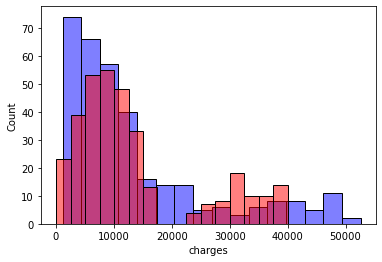

In [66]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## KNN Regression

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [68]:
y_test_pred = knn.predict(X_test_transformed)

In [69]:
knn_mae = metrics.mean_absolute_error(y_test, y_test_pred)
knn_mae

4144.935116677611

In [70]:
knn_mse = metrics.mean_squared_error(y_test, y_test_pred)
knn_mse

45681866.57469418

In [71]:
knn_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
knn_rmse

6758.8361849281555

In [72]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,8433.604400
610,8547.69130,7948.160220
569,45702.02235,29049.586058
1034,12950.07120,12094.782330
198,9644.25250,11108.725660


<AxesSubplot:xlabel='charges', ylabel='Count'>

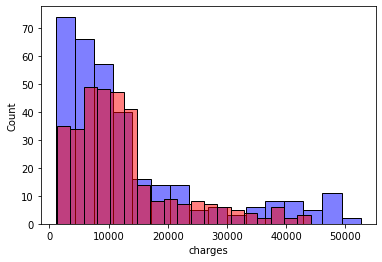

In [73]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## Decision Tree Regression

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [75]:
y_test_pred = dt.predict(X_test_transformed)

In [76]:
dt_mae = metrics.mean_absolute_error(y_test, y_test_pred)
dt_mae

2932.1072425641787

In [77]:
dt_mse = metrics.mean_squared_error(y_test, y_test_pred)
dt_mse

40353810.03063696

In [78]:
dt_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
dt_rmse

6352.464878347378

In [79]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,10085.84600
610,8547.69130,8233.09750
569,45702.02235,44202.65360
1034,12950.07120,12741.16745
198,9644.25250,9264.79700


<AxesSubplot:xlabel='charges', ylabel='Count'>

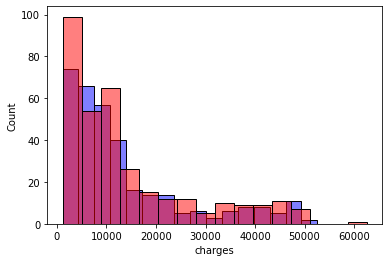

In [80]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## Support vector regressor

In [81]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_transformed, y_train)

SVR()

In [82]:
y_test_pred = dt.predict(X_test_transformed)

In [83]:
svr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
svr_mae

2932.1072425641787

In [84]:
svr_mse = metrics.mean_squared_error(y_test, y_test_pred)
svr_mse

40353810.03063696

In [85]:
svr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
svr_rmse

6352.464878347378

In [86]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,10085.84600
610,8547.69130,8233.09750
569,45702.02235,44202.65360
1034,12950.07120,12741.16745
198,9644.25250,9264.79700


<AxesSubplot:xlabel='charges', ylabel='Count'>

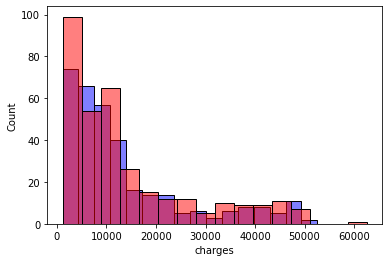

In [87]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## Random Forest Regression

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [89]:
y_test_pred = rf.predict(X_test_transformed)

In [90]:
rf_mae = metrics.mean_absolute_error(y_test, y_test_pred)
rf_mae

2674.032017110597

In [91]:
rf_mse = metrics.mean_squared_error(y_test, y_test_pred)
rf_mse

19738898.729443856

In [92]:
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
rf_rmse

4442.848042578527

In [93]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,10371.690038
610,8547.69130,10439.123154
569,45702.02235,45429.745767
1034,12950.07120,13240.915518
198,9644.25250,9459.972850


<AxesSubplot:xlabel='charges', ylabel='Count'>

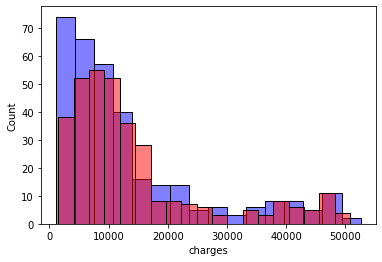

In [94]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

## GradientBoostingRegressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train_transformed,y_train)

GradientBoostingRegressor()

In [96]:
y_test_pred = gbr.predict(X_test_transformed)

In [97]:
gbr_mae = metrics.mean_absolute_error(y_test, y_test_pred)
gbr_mae

2418.9722327162794

In [98]:
gbr_mse = metrics.mean_squared_error(y_test, y_test_pred)
gbr_mse

15974675.931615168

In [99]:
gbr_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
gbr_rmse

3996.8332379041244

In [100]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
578,9724.53000,12000.468696
610,8547.69130,9496.052685
569,45702.02235,46238.972154
1034,12950.07120,14502.929530
198,9644.25250,10693.365565


<AxesSubplot:xlabel='charges', ylabel='Count'>

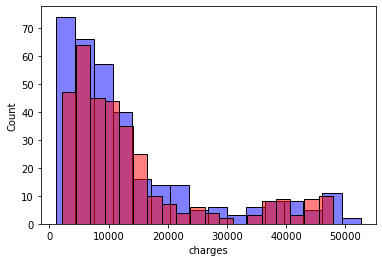

In [101]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [102]:
models = [('Linear Regression',lr_mae,lr_mse,lr_rmse),
          ('KNN Regression',knn_mae,knn_mse,knn_rmse),
          ('Decision Tree Regression',dt_mae,dt_mse,dt_rmse),
          ('Support Vector Regression',svr_mae,svr_mse,svr_rmse),
          ('Random Forest Regression',rf_mae,rf_mse,rf_rmse),
          ('Gradient Boosting Regression',gbr_mae,gbr_mse,gbr_rmse)]

In [106]:
predict = pd.DataFrame(data = models, columns=['Algorithm','Mean absolute error','Mean squared error','Root mean squared error'])
predict.sort_values(by = 'Mean absolute error', ascending = True)

,Algorithm,Mean absolute error,Mean squared error,Root mean squared error
5,Gradient Boosting Regression,2418.972233,1.597468e+07,3996.833238
4,Random Forest Regression,2674.032017,1.973890e+07,4442.848043
2,Decision Tree Regression,2932.107243,4.035381e+07,6352.464878
3,Support Vector Regression,2932.107243,4.035381e+07,6352.464878
0,Linear Regression,4019.322495,3.213303e+07,5668.600498
1,KNN Regression,4144.935117,4.568187e+07,6758.836185


Conclusion:

In this project, by using a set of ML algorithms, a computational intelligence approach is applied to predict healthcare insurance costs. The medical insurance dataset was utilised for training and testing the Linear Regression, KNN Regressor, Support Vector Regression, GradientBoostingRegressor, Decision Tree and Random Forest Regressor, ML algorithms. The regression analysis of this dataset followed the steps of data splitting, preprocessing, Fitting the regression models, and evaluation. The resultant outcome revealed that Gradient Boosting Regressor achieved least error .